# Notebook pour réaliser le graphique de statistiques IAA général

Version : python 3.7

Dernière MAJ : 02/09/2021

Auteur : Lucas Terriel

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
csv_file = './in/general_stats.csv'

df = pd.read_csv(csv_file, sep=r',', encoding='utf-8', header=0)
# Débute l'index du tableau à 1
df.index += 1 
df

Kappa  Alignement  Non_Alignement
1  51.30       35.70           64.30
2  66.44       52.30           47.80
3  68.60       55.23           44.76

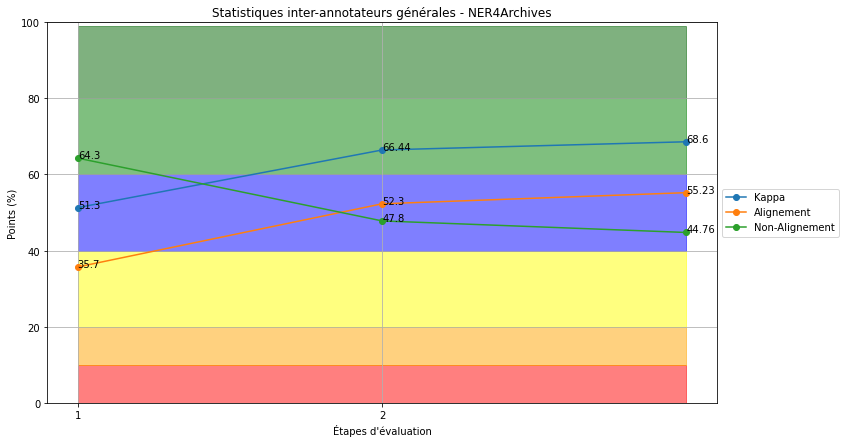

In [6]:
fig = df.plot(figsize=(12,7), 
              kind='line',
              grid=True,
              use_index=True,
              xlabel="Étapes d'évaluation",
              ylabel='Points (%)',
              marker='o',
              xticks=range(1,len(df.columns)),
              ylim=(0,100), 
              title='Statistiques inter-annotateurs générales - NER4Archives')

headers = ['Kappa', 'Alignement', 'Non_Alignement']

# create kappa area
fig.axvspan(1, 3, ymin=0, ymax=0.10, alpha=0.5, color='red')
fig.axvspan(1, 3, ymin=0.10, ymax=0.20, alpha=0.5, color='orange')
fig.axvspan(1, 3, ymin=0.20, ymax=0.40, alpha=0.5, color='yellow')
fig.axvspan(1, 3, ymin=0.40, ymax=0.60, alpha=0.5, color='blue')
fig.axvspan(1, 3, ymin=0.60, ymax=0.80, alpha=0.5, color='green')
fig.axvspan(1, 3, ymin=0.80, ymax=0.99, alpha=0.5, color='darkgreen')

def annotate_scatters(fig, dataframe, headers):
    """Ajouter les scores sur les points"""
    for head in headers:
        counter = 1
        for y in dataframe[head]:
            fig.annotate(y, xy=(float(counter),y), textcoords='data')
            counter += 1
    return fig

fig = annotate_scatters(fig, df, headers)

fig.legend(labels=['Kappa', 'Alignement', 'Non-Alignement'], loc="right", bbox_to_anchor=(1.19, 0.5))
plt.savefig(f'./out/general_stats_ner4archives.png', dpi=400)
plt.show()